In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:

data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Cleaning and Exploration ###

In [4]:
data.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
#Data Types
data.dtypes
data.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### EDA ###

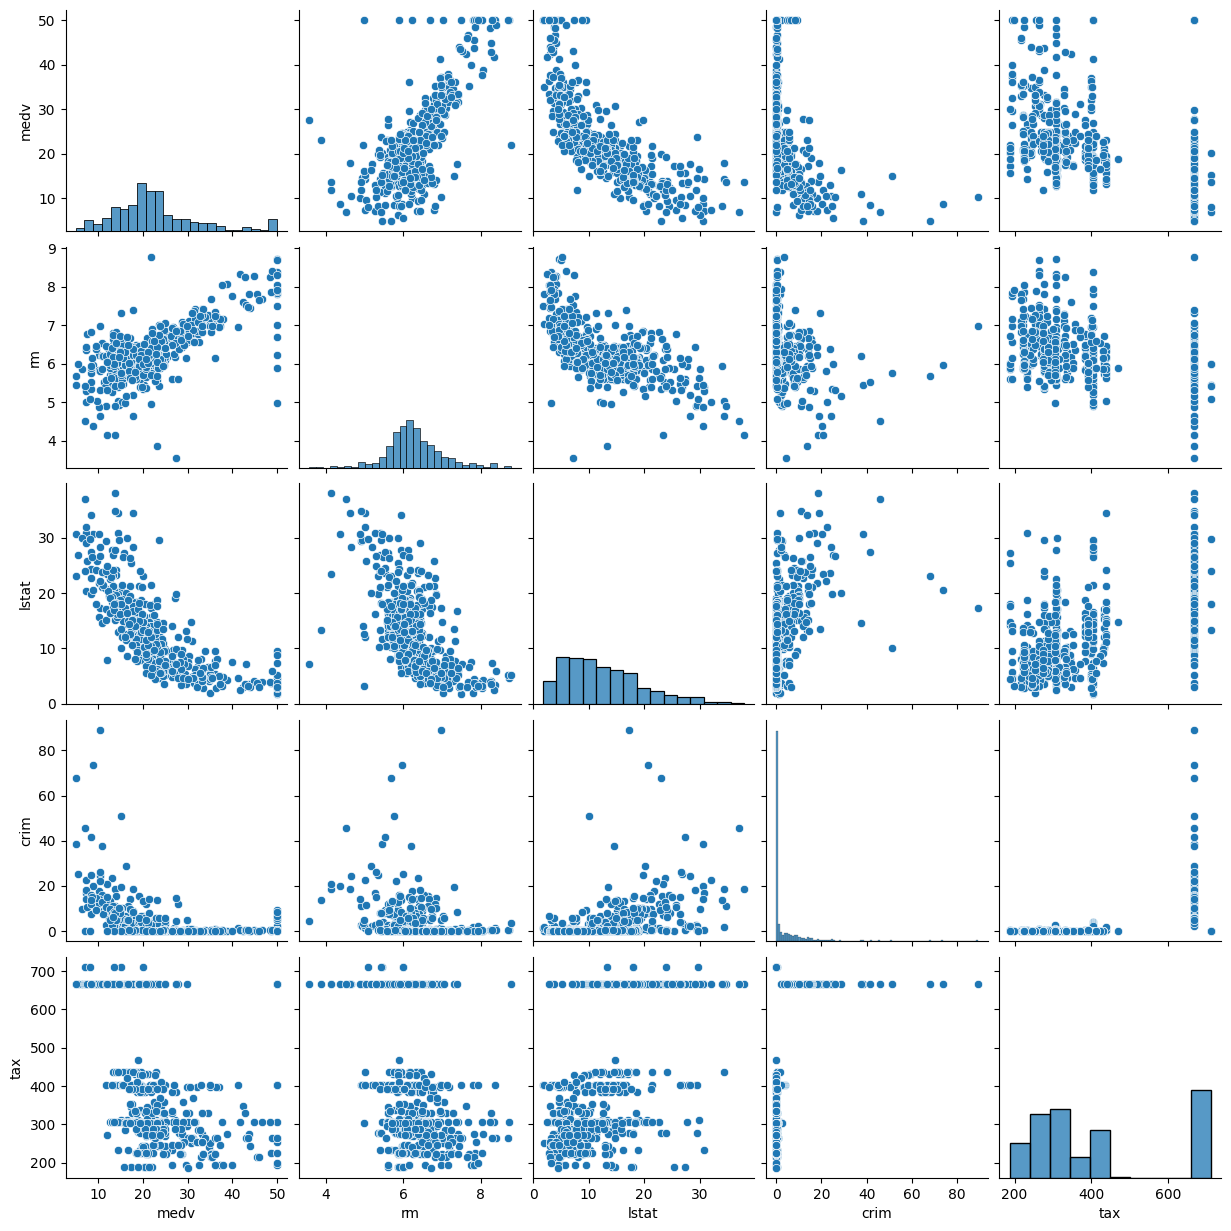

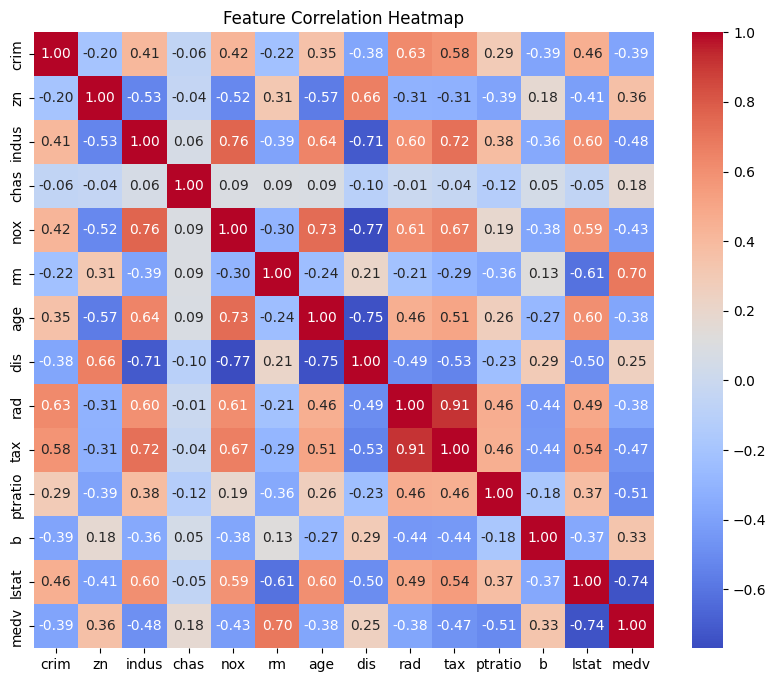

In [6]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data[['medv', 'rm', 'lstat', 'crim', 'tax']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

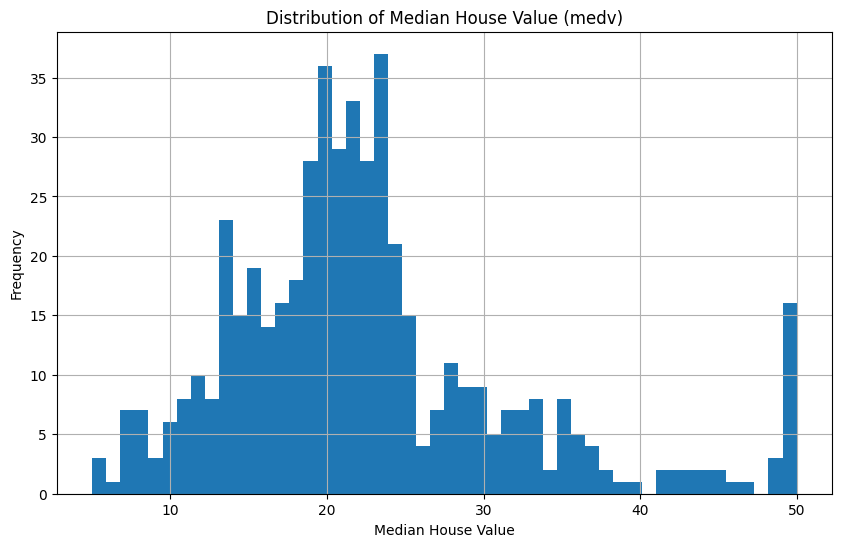

In [7]:
import matplotlib.pyplot as plt

# Distribution of 'medv' (Median house value)
plt.figure(figsize=(10,6))
data['medv'].hist(bins=50)
plt.title('Distribution of Median House Value (medv)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

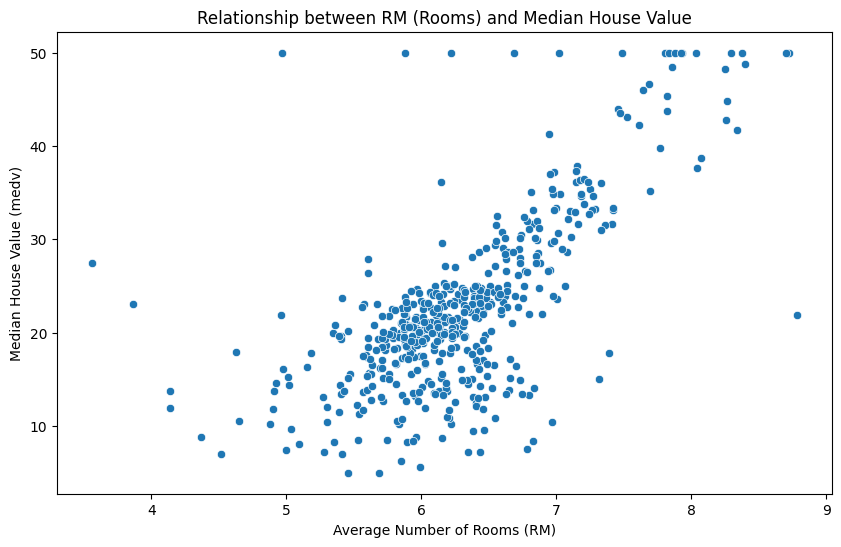

In [8]:
# Scatter plot: Relationship between 'RM' (average number of rooms) and 'medv' (price)
plt.figure(figsize=(10,6))
sns.scatterplot(x='rm', y='medv', data=data)
plt.title('Relationship between RM (Rooms) and Median House Value')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (medv)')
plt.show()


### Feature Engineering ###

In [9]:
from sklearn.preprocessing import StandardScaler

# Scaling the numerical columns
features = data.drop('medv', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Baseline Model ###

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = scaled_data  # Features
y = data['medv']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24.291119474973492
R-squared: 0.6687594935356324


### Optimization and Model comparison ###

In [11]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Data Preprocessing
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [12]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
feature_importance = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")
    # Capture feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = model.feature_importances_


Linear Regression Performance:
MAE: 3.19, RMSE: 4.93, R2: 0.67

Random Forest Performance:
MAE: 2.04, RMSE: 2.83, R2: 0.89

Gradient Boosting Performance:
MAE: 1.92, RMSE: 2.50, R2: 0.91



In [13]:
# Compare model performance
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE      RMSE        R2
Linear Regression  3.189092  4.928602  0.668759
Random Forest      2.042049  2.834046  0.890476
Gradient Boosting  1.920681  2.498034  0.914907



Top Factors Influencing House Prices:
    Feature  Importance
5        rm    0.503879
12    lstat    0.309644
7       dis    0.059821
0      crim    0.037357
10  ptratio    0.018134
9       tax    0.015333
4       nox    0.015079
6       age    0.013313
11        b    0.012723
2     indus    0.007507


/var/folders/19/_djhhd2d4j1drxs9ryt60rtm0000gn/T/ipykernel_70615/2936034057.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


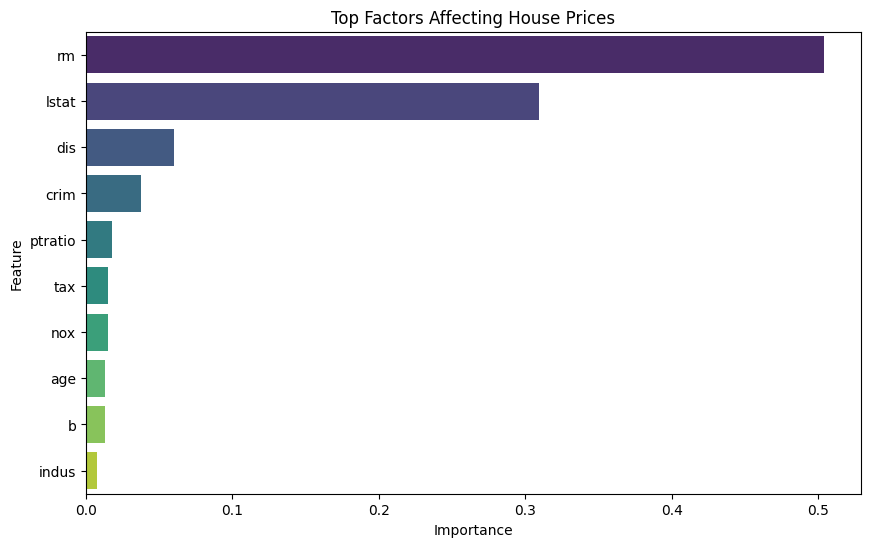

In [14]:
# Analyze important features for Random Forest
if 'Random Forest' in feature_importance:
    importances = feature_importance['Random Forest']
    feature_names = num_features + cat_features
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("\nTop Factors Influencing House Prices:")
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
    plt.title("Top Factors Affecting House Prices")
    plt.show()
